In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import json, csv
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

In [3]:
with open('C:/Users/agkat/Documents/College/1. SML/A1/domain1_train.json', 'r') as file:
   domain1_data = [json.loads(line) for line in file]

with open('C:/Users/agkat/Documents/College/1. SML/A1/domain2_train.json', 'r') as file:
    domain2_data = [json.loads(line) for line in file]


# Split data into Testing and Validation sets
## Nearest Neighbours are Edited here

In [37]:
# Separate the text and labels
X1 = pad_sequences([instance['text'] for instance in domain1_data], padding='post', value=0, maxlen=1075)
Y1 = [instance['label'] for instance in domain1_data]

X2 = pad_sequences([instance['text'] for instance in domain2_data], padding='post', value=0, maxlen=1075)
Y2 = [instance['label'] for instance in domain2_data]

In [64]:
# Split the data into training and validation sets
TrainX1, ValX1, TrainY1, ValY1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)
TrainX2, ValX2, TrainY2, ValY2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [10]:
np.array(TrainValX1)

array([[ 401, 1589,    0, ...,    0,    0,    0],
       [ 767,   17,    0, ...,    0,    0,    0],
       [   9,   21, 1064, ...,    0,    0,    0],
       ...,
       [   2,  104,  103, ...,    0,    0,    0],
       [   2,  206,    6, ...,    0,    0,    0],
       [3111,    8,   15, ...,    0,    0,    0]])

In [111]:
enn = EditedNearestNeighbours(n_neighbors=10)
X_train_enn, y_train_enn = enn.fit_resample(TrainX2, TrainY2)



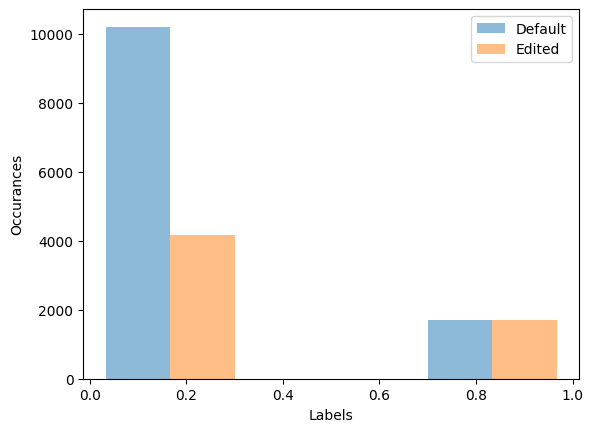

In [112]:
plt.hist([TrainY2, y_train_enn], np.linspace(0, 1, 4), alpha=0.5, label=['Default','Edited'])
#plt.hist(, np.linspace(0, 1, 4), alpha=0.5, label='Default')
plt.xlabel('Labels')
plt.ylabel('Occurances')
plt.legend()
plt.show()


In [121]:
smotenn = SMOTEENN(sampling_strategy=0.75, )
X_train_enn, y_train_enn = smotenn.fit_resample(TrainX2, TrainY2)

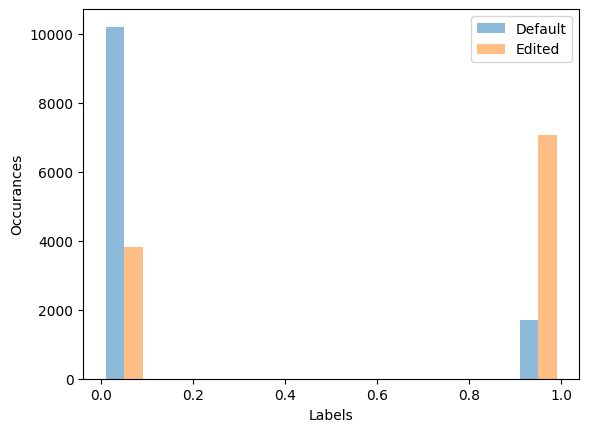

In [122]:
plt.hist([TrainY2, y_train_enn], alpha=0.5, label=['Default','Edited'])
#plt.hist(, np.linspace(0, 1, 4), alpha=0.5, label='Default')
plt.xlabel('Labels')
plt.ylabel('Occurances')
plt.legend()
plt.show()
